### OBJECTIVE

The objective of this project is to develop a machinelearning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore. This predictive model will be based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resalevalue of a flat.

# Cleaning the data and training the model

### Getting started

In [73]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Reading data

In [74]:
# Reading the csv data as dataframes
df1=pd.read_csv(r'C:\Users\hp\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2=pd.read_csv(r'C:\Users\hp\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3=pd.read_csv(r'C:\Users\hp\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4=pd.read_csv(r'C:\Users\hp\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5=pd.read_csv(r'C:\Users\hp\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [75]:
# Shape of each dataframes
dfs=[df1,df2,df3,df4,df5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(167869, 11)


In [76]:
# Concating all dataframes to a single dataframe
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

### Understanding the data and cleaning

In [77]:
# Displaying the data
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [78]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
914067,2023-12,YISHUN,5 ROOM,334C,YISHUN ST 31,13 TO 15,112.0,Improved,2015,650000.0,91 years 01 month
914068,2023-12,YISHUN,EXECUTIVE,328,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,798000.0,63 years 07 months
914069,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
914070,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
914071,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,63 years 02 months


In [79]:
# Shape of the data
df.shape

(914072, 11)

In [80]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914072 entries, 0 to 914071
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914072 non-null  object 
 1   town                 914072 non-null  object 
 2   flat_type            914072 non-null  object 
 3   block                914072 non-null  object 
 4   street_name          914072 non-null  object 
 5   storey_range         914072 non-null  object 
 6   floor_area_sqm       914072 non-null  float64
 7   flat_model           914072 non-null  object 
 8   lease_commence_date  914072 non-null  int64  
 9   resale_price         914072 non-null  float64
 10  remaining_lease      205022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ MB


In [81]:
# Unique values in each column
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  408 labels
town :  27 labels
flat_type :  8 labels
block :  2696 labels
street_name :  584 labels
storey_range :  25 labels
floor_area_sqm :  210 labels
flat_model :  34 labels
lease_commence_date :  56 labels
resale_price :  9340 labels
remaining_lease :  719 labels


In [82]:
# Null values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

Droping the 'remaining_lease' column as majority of the rows lacks this value(data is available only from 2015)

In [83]:
# Droping the column as mojority of the data is null
df = df.drop(columns='remaining_lease')

In [84]:
# After droping the column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

C:\Program Files\KMSpico\temp\ipykernel_36536\3192126979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['resale_price'], bins = 20)


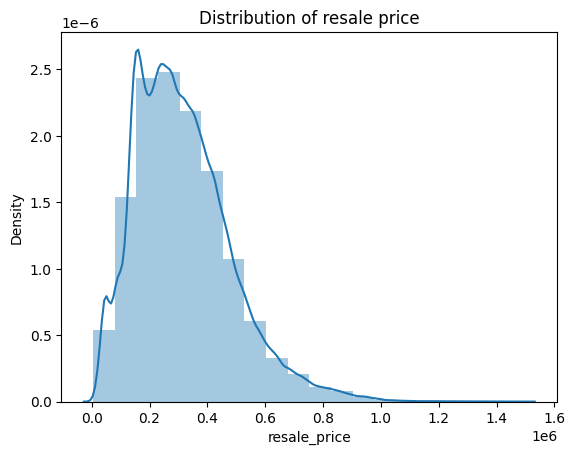

In [85]:
# Visualize the distribution of the resale price column
sns.distplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')
plt.show()

### Dealing with Features

#### flat_type column
Collapsing flat type categories

In [86]:
df['flat_type'].value_counts()

flat_type
4 ROOM              346729
3 ROOM              292761
5 ROOM              192444
EXECUTIVE            68851
2 ROOM               11449
1 ROOM                1300
MULTI GENERATION       279
MULTI-GENERATION       259
Name: count, dtype: int64

In [87]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [88]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

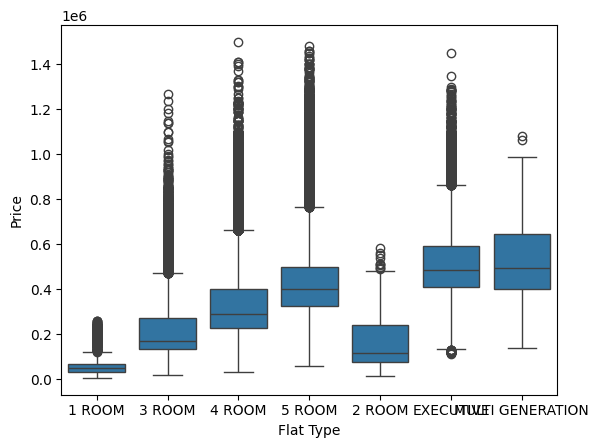

In [89]:
# Visualize relationship between price and flat_type
sns.boxplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()

Encoding the flat type categories

In [90]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

flat_type
4    346729
3    292761
5    192444
6     68851
2     11449
1      1300
7       538
Name: count, dtype: int64

Dealing with collapsed flat model categories

#### flat_model column

In [91]:
# Flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [92]:
# Deal with capitalized value
df['flat_model'] = df['flat_model'].str.lower()

In [93]:
# Number of unique lables in flat model after dealing with capitalized values
df['flat_model'].nunique()

21

In [94]:
# Altered flat_model column
df['flat_model'].value_counts()

flat_model
model a                   259893
improved                  238739
new generation            187436
simplified                 57093
premium apartment          45491
standard                   42253
apartment                  35078
maisonette                 29335
model a2                    9992
dbss                        3171
model a-maisonette          2055
adjoined flat               1231
terrace                      688
multi generation             538
type s1                      429
type s2                      211
improved-maisonette          125
2-room                       104
premium apartment loft       103
premium maisonette            86
3gen                          21
Name: count, dtype: int64

In [95]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()

flat_modelcode= le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [96]:
df['flat_modelcode'].value_counts()

flat_modelcode
8     259893
5     238739
12    187436
16     57093
13     45491
17     42253
3      35078
7      29335
10      9992
4       3171
9       2055
2       1231
18       688
11       538
19       429
20       211
6        125
0        104
14       103
15        86
1         21
Name: count, dtype: int64

#### Other features preparation

In [97]:
# Town column 
df['town'].nunique()

27

In [98]:
df['town'].value_counts()

town
TAMPINES           79056
YISHUN             69169
BEDOK              66007
JURONG WEST        65733
WOODLANDS          64586
ANG MO KIO         51597
HOUGANG            49989
BUKIT BATOK        43604
CHOA CHU KANG      37728
BUKIT MERAH        33866
PASIR RIS          32903
SENGKANG           31528
TOA PAYOH          31176
QUEENSTOWN         28460
GEYLANG            27910
CLEMENTI           27775
BUKIT PANJANG      27297
KALLANG/WHAMPOA    26798
JURONG EAST        24502
SERANGOON          22610
BISHAN             21098
PUNGGOL            19713
SEMBAWANG          13374
MARINE PARADE       7978
CENTRAL AREA        7065
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: count, dtype: int64

In [99]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [100]:
# Encoded value count
df['town_code'].value_counts()

town_code
23    79056
26    69169
1     66007
13    65733
25    64586
0     51597
11    49989
3     43604
8     37728
4     33866
17    32903
21    31528
24    31176
19    28460
10    27910
9     27775
5     27297
14    26798
12    24502
22    22610
2     21098
18    19713
20    13374
16     7978
7      7065
6      2486
15       64
Name: count, dtype: int64

#### Dividing the columns

In [101]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [102]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [103]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [104]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [105]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [106]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])

In [107]:
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [108]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


#### Dealing with datatypes

In [109]:
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [110]:
# Changing the datatype of numeric columns
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']].astype('int')

In [111]:
df.dtypes

month                   object
selling_year             int32
selling_month            int32
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min               int32
storey_max               int32
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

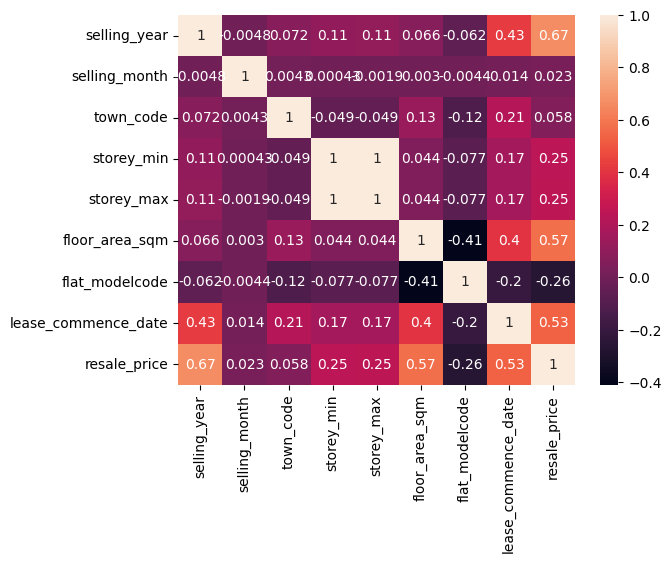

In [112]:
# Correlation for the feature
corr_df = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True)

### Training the model

In [113]:
# Assigning the data
X = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date']]
y = df['resale_price']

In [114]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### Linear Regression

In [115]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [116]:
# Accuracy score of the model
score = lin_reg.score(X_test,y_test)
print(score * 100,"%")

75.51790736097426 %


#### Decision Tree Regressor

In [117]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [118]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print(score * 100,"%")

95.9855886564812 %


#### Random Forest Regressor

In [119]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [120]:
# Accuracy of the model
score = rf_reg.score(X_test,y_test)
print(score * 100,"%")

97.65220186343254 %


Pickling the random forest trained knowledge to build streamlit ML model web page

In [121]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_rfr_pkl","wb") as files:
  pickle.dump(rf_reg, files)